
Script:data_preprocessing_pipleline.py
Description:
This script loads the loan approval dataset, cleans column names, removes
rows with missing target values (`loan_status`), and reports the number of
missing values per column for further preprocessing decisions.



In [6]:
#Import pandas for data manipulation and analysis
import pandas as pd

In [7]:
# Step 1: Load the dataset from the local CSV file
# Replace the path if using a different working directory
# Clean column names and string values
csv_path = 'loan_approval_dataset.csv'
df = pd.read_csv(csv_path)

In [8]:
# Strip whitespace from column names and string columns
df.columns = df.columns.str.strip() #Remove whitespace from column headers
df['education'] = df['education'].str.strip() # Clean 'education' values
df['self_employed'] = df['self_employed'].str.strip()# Clean 'self_employed' values
df['loan_status'] = df['loan_status'].str.strip()# Clean 'loan_status' values

In [9]:
# Step 2: Map categorical string values to binary numerical values
# These are required for ML models which expect numeric input
df['education'] = df['education'].map({'Graduate': 1, 'Not Graduate': 0})
df['self_employed'] = df['self_employed'].map({'Yes': 1, 'No': 0})
df['loan_status'] = df['loan_status'].map({'Approved': 1, 'Rejected': 0})

In [10]:
# Step 3: Save the encoded dataset to a new CSV file
# This intermediate file will be used for scaling
encoded_csv_path = "loan_approval_encoded.csv"
df.to_csv(encoded_csv_path, index=False)

In [11]:
# Step 4: Display a preview of the encoded categorical columns
df[['education', 'self_employed', 'loan_status']].head()

,education,self_employed,loan_status
0,1,0,1
1,0,1,0
2,1,0,0
3,1,0,0
4,0,1,0


In [12]:
# Step 5: Import MinMaxScaler and apply normalization
from sklearn.preprocessing import MinMaxScaler

# Load the encoded dataset
df = pd.read_csv("loan_approval_encoded.csv")

# Step 6: Identify numeric columns for scaling
# Exclude the target column ('loan_status') and identifier ('loan_id')
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
numeric_cols = numeric_cols.drop('loan_status', errors='ignore')  # Target column
numeric_cols = numeric_cols.drop(['loan_id'], errors='ignore')

# Step 7: Apply MinMaxScaler to normalize features to range [0, 1]
scaler = MinMaxScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# Step 8: Save the scaled dataset to a new CSV file
scaled_csv_path = "loan_approval_scaled.csv"
df.to_csv(scaled_csv_path, index=False)

# Step 9: Display a preview of the scaled numeric features
df[numeric_cols].head()


,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
0,0.4,1.0,0.0,0.969072,0.755102,0.555556,0.796667,0.085616,0.907216,0.575835,0.544218
1,0.0,0.0,1.0,0.402062,0.303571,0.333333,0.195000,0.095890,0.113402,0.218509,0.224490
2,0.6,1.0,0.0,0.917526,0.750000,1.000000,0.343333,0.246575,0.231959,0.848329,0.870748
3,0.6,1.0,0.0,0.824742,0.775510,0.333333,0.278333,0.626712,0.170103,0.591260,0.537415
4,1.0,0.0,1.0,0.989691,0.609694,1.000000,0.136667,0.428082,0.422680,0.748072,0.340136


Data Visualization 

Description:
The scaled data is used to perform exploratory data visualization using this script.
 encoded loan approval dataset. It includes:
     - Loan approval distribution
     - Annual income histogram
     - CIBIL score by loan status
     - Feature correlation heatmap
    - Comparison of loan status between education levels

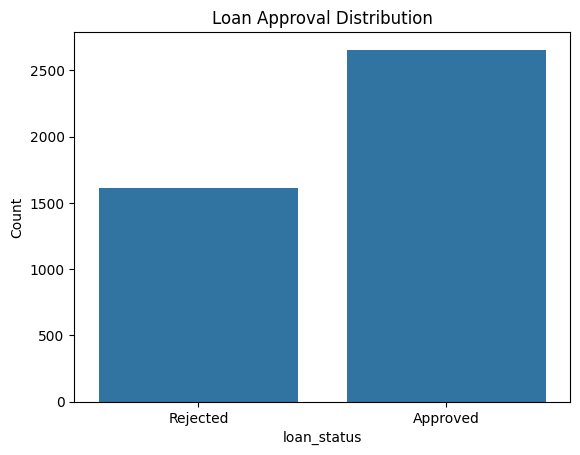

In [13]:
import seaborn as sns #Seaborn: high-level plotting API built on top of Matplotlib for statistical graphics
import matplotlib.pyplot as plt #Matplotlib's pyplot: provides control over plots (titles, labels, show, etc.)

# Plot 1: This is the count of approved vs rejected loans in a Loan Approval Distribution.
#sns.countplot() shows counts of each class (Approved/Rejected)
# plt handles title, axis labels, and rendering
sns.countplot(x='loan_status', data=df)
plt.title('Loan Approval Distribution')
plt.xticks([0, 1], ['Rejected', 'Approved'])
plt.ylabel('Count')
plt.show()


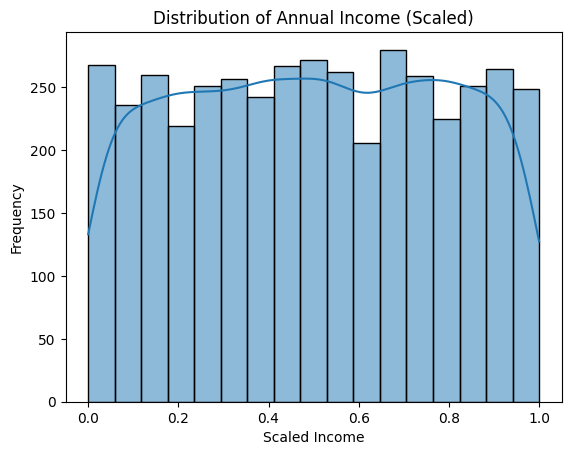

In [14]:
# Plot 2 : Distribution of Annual Income (scaled) visualizes distribution of income among applicants
# sns.histplot() plots a histogram and optional KDE (density curve)
# plt customizes labels and title
sns.histplot(df['income_annum'], kde=True)
plt.title('Distribution of Annual Income (Scaled)')
plt.xlabel('Scaled Income')
plt.ylabel('Frequency')
plt.show()


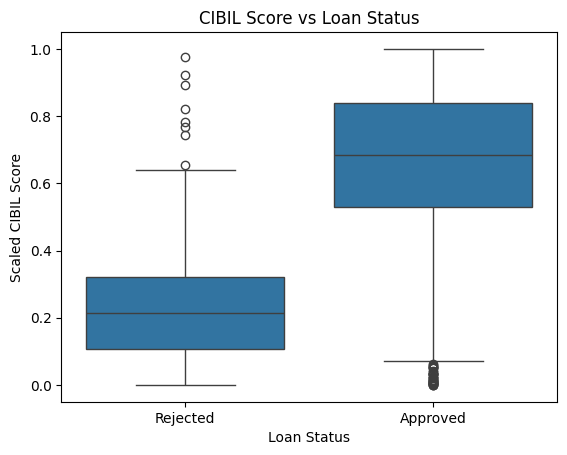

In [15]:
#Plot3:  CIBIL Score vs Loan Status (boxplot) Comparing the CIBIL scores between approved and rejected loan applications
# sns.boxplot() shows CIBIL score distribution across loan status groups
sns.boxplot(x='loan_status', y='cibil_score', data=df)
plt.title('CIBIL Score vs Loan Status')
plt.xticks([0, 1], ['Rejected', 'Approved'])
plt.xlabel('Loan Status')
plt.ylabel('Scaled CIBIL Score')
plt.show()


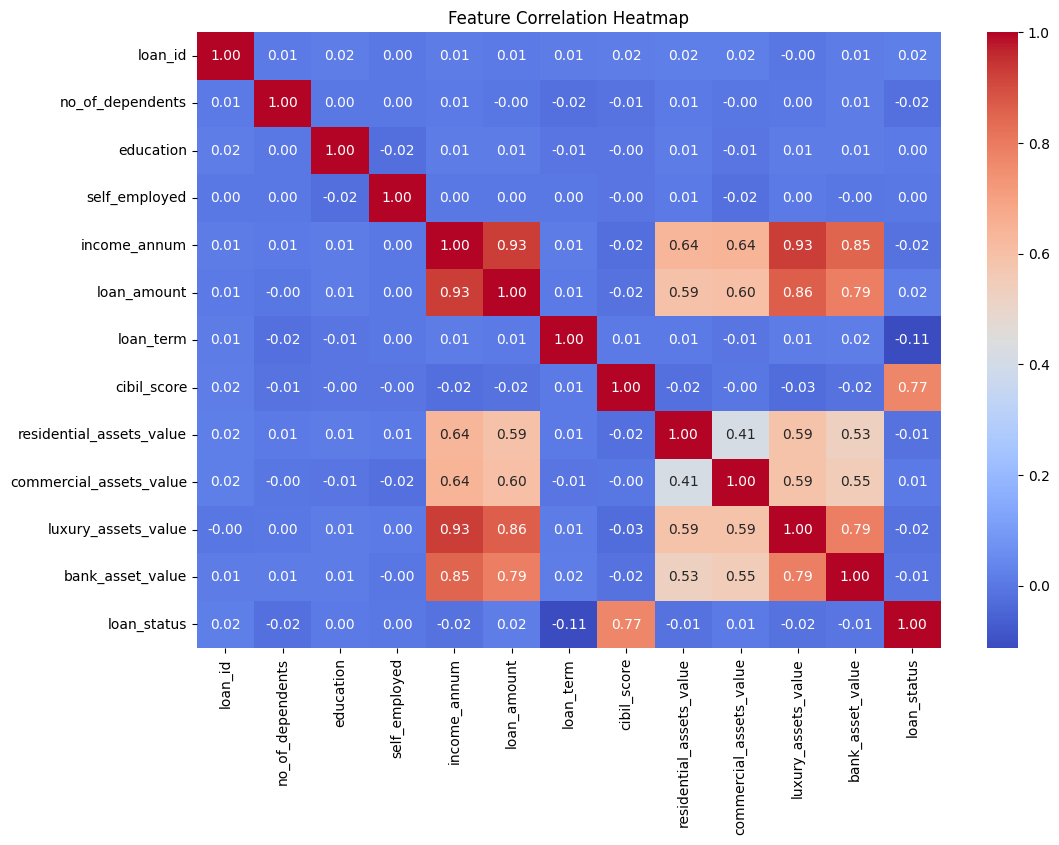

In [16]:
#Plot 4 :  Feature Correlation Heatmap Displays pairwise correlations between all numeric features and is plotted 
# sns.heatmap() visualizes pairwise feature correlations
# plt sets size and title
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()


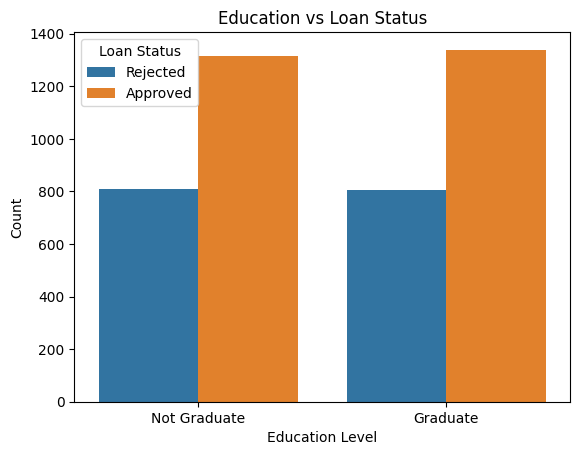

In [17]:
#Plot 5 :  Education vs Loan Status (grouped bar plot) Examines the relationship between education level and loan approval outcome
# sns.countplot() with hue compares education levels by loan status
sns.countplot(x='education', hue='loan_status', data=df)
plt.title('Education vs Loan Status')
plt.xticks([0, 1], ['Not Graduate', 'Graduate'])
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.legend(title='Loan Status', labels=['Rejected', 'Approved'])
plt.show()
